In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as osa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from numpy.random import seed
from tensorflow.random import set_seed
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [57]:
levels = ['Class', 'Family' 'Genus', 'Order', 'Species']
diseases = ['T2D', 'IBD', 'CAD', 'CKD']
to_nominal = {'healthy': 0, 'T2D': 1, 'IBD': 2, 'CAD': 3, 'CKD': 4}

def intersect(A, B):
    return list(filter(lambda x: x in A, B))

def setup_df(level):
    D = {disease: pd.read_csv(disease + '\\' + level + disease + '_train.csv') for disease in diseases}
    for disease in diseases:
        X = D[disease]
        X.loc[X['label'] == 1, 'label'] = to_nominal[disease]
    columns = intersect(intersect(intersect(D['CAD'].columns, D['CKD'].columns), D['IBD'].columns), D['T2D'].columns)
    data = {col: pd.concat([D[disease][col] for disease in diseases]) for col in columns}
    return pd.DataFrame(data=data)

In [58]:
df = setup_df(level='Family').drop(['sample_ID'], axis=1)
df.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae,Bacteria;Acidobacteriota;Aminicenantia;Aminicenantales;uncultured bacterium,Bacteria;Acidobacteriota;Blastocatellia;Blastocatellales;Blastocatellaceae,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Frankiaceae,...,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae,Bacteria;Spirochaetota;Brachyspirae;Brachyspirales;Brachyspiraceae,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae,Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;vadinBE97,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Opitutales;Puniceicoccaceae,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae,Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Rubritaleaceae,label
0,0,0,0,0,19,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,2,0,1,0,0,0,...,0,2,0,0,0,0,0,1,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
Y = df.loc[:, 'label'].astype('category')
X = df.iloc[:, :(len(df.columns) - 1)]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, Y_train = osa.ADASYN().fit_sample(X_train, Y_train)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = pd.DataFrame(min_max_scaler.transform(X_train), columns=X_train.columns)
Y_train = pd.get_dummies(Y_train)

In [60]:
seed(1)
set_seed(42)

epochs = 100
batch_size = 5

model = Sequential()
model.add(Dense(80, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f'accuracy={accuracy}, loss={loss}')

Epoch 1/100
1679/1679 [==============================] - 3s 1ms/step - loss: 0.3812 - accuracy: 0.5117
Epoch 2/100
1679/1679 [==============================] - 2s 1ms/step - loss: 0.1891 - accuracy: 0.7805
Epoch 3/100
1679/1679 [==============================] - 2s 1ms/step - loss: 0.1222 - accuracy: 0.8537
Epoch 4/100
1679/1679 [==============================] - 2s 1ms/step - loss: 0.0945 - accuracy: 0.8876
Epoch 5/100
1679/1679 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9107
Epoch 6/100
1679/1679 [==============================] - 4s 2ms/step - loss: 0.0628 - accuracy: 0.9335
Epoch 7/100
1679/1679 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9500
Epoch 8/100
1679/1679 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9647
Epoch 9/100
1679/1679 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9739
Epoch 10/100
1679/1679 [==============================] - 3s 2ms/step - l

1679/1679 [==============================] - 3s 2ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 79/100
1679/1679 [==============================] - 3s 2ms/step - loss: 0.0073 - accuracy: 0.9945
Epoch 80/100
1679/1679 [==============================] - 3s 2ms/step - loss: 8.4518e-05 - accuracy: 1.0000
Epoch 81/100
1679/1679 [==============================] - 3s 2ms/step - loss: 4.5548e-06 - accuracy: 1.0000
Epoch 82/100
1679/1679 [==============================] - 4s 2ms/step - loss: 2.5887e-06 - accuracy: 1.0000
Epoch 83/100
1679/1679 [==============================] - 3s 2ms/step - loss: 1.7015e-06 - accuracy: 1.0000
Epoch 84/100
1679/1679 [==============================] - 3s 2ms/step - loss: 1.1679e-06 - accuracy: 1.0000
Epoch 85/100
1679/1679 [==============================] - 3s 2ms/step - loss: 6.7829e-07 - accuracy: 1.0000
Epoch 86/100
1679/1679 [==============================] - 3s 2ms/step - loss: 3.8122e-07 - accuracy: 1.0000
Epoch 87/100
1679/1679 [=========================

In [61]:
X_test = pd.DataFrame(min_max_scaler.transform(X_test), columns=X_train.columns)
Y_test = pd.get_dummies(Y_test)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'accuracy={accuracy}, loss={loss}')

Epoch 1/100
1679/1679 [==============================] - 2s 1ms/step - loss: 3.4654e-06 - accuracy: 1.0000 - val_loss: 1.8941 - val_accuracy: 0.8336
Epoch 2/100
1679/1679 [==============================] - 2s 1ms/step - loss: 2.0805e-06 - accuracy: 1.0000 - val_loss: 1.9257 - val_accuracy: 0.8318
Epoch 3/100
1679/1679 [==============================] - 3s 2ms/step - loss: 1.1566e-06 - accuracy: 1.0000 - val_loss: 1.9719 - val_accuracy: 0.8318
Epoch 4/100
1679/1679 [==============================] - 3s 2ms/step - loss: 5.7911e-07 - accuracy: 1.0000 - val_loss: 2.0584 - val_accuracy: 0.8301
Epoch 5/100
1679/1679 [==============================] - 4s 3ms/step - loss: 2.7524e-07 - accuracy: 1.0000 - val_loss: 2.1448 - val_accuracy: 0.8283
Epoch 6/100
1679/1679 [==============================] - 4s 2ms/step - loss: 1.2092e-07 - accuracy: 1.0000 - val_loss: 2.2029 - val_accuracy: 0.8318
Epoch 7/100
1679/1679 [==============================] - 4s 2ms/step - loss: 5.1746e-08 - accuracy: 1.0000

1679/1679 [==============================] - 3s 2ms/step - loss: 1.4313e-09 - accuracy: 1.0000 - val_loss: 2.8989 - val_accuracy: 0.8318
Epoch 57/100
1679/1679 [==============================] - 3s 2ms/step - loss: 8.4780e-10 - accuracy: 1.0000 - val_loss: 2.9741 - val_accuracy: 0.8318
Epoch 58/100
1679/1679 [==============================] - 3s 2ms/step - loss: 5.7632e-10 - accuracy: 1.0000 - val_loss: 2.9981 - val_accuracy: 0.8354
Epoch 59/100
1679/1679 [==============================] - 4s 2ms/step - loss: 0.0103 - accuracy: 0.9959 - val_loss: 2.3276 - val_accuracy: 0.8283
Epoch 60/100
1679/1679 [==============================] - 3s 2ms/step - loss: 6.5540e-06 - accuracy: 1.0000 - val_loss: 2.2628 - val_accuracy: 0.8354
Epoch 61/100
1679/1679 [==============================] - 3s 2ms/step - loss: 1.9245e-06 - accuracy: 1.0000 - val_loss: 2.2805 - val_accuracy: 0.8336
Epoch 62/100
1679/1679 [==============================] - 3s 2ms/step - loss: 1.2019e-06 - accuracy: 1.0000 - val_los

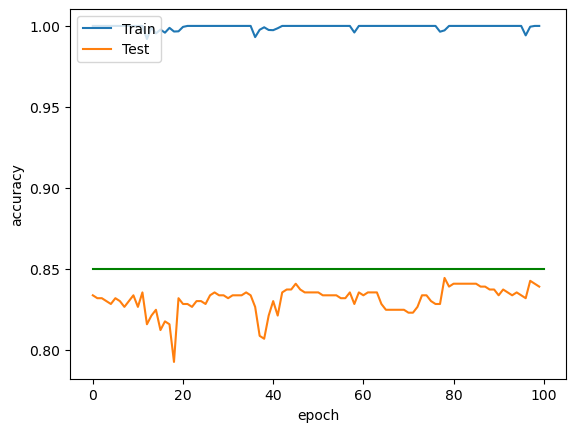

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
x = np.linspace(0, 100, 100)
y = np.linspace(0.85, 0.85, 100)
plt.plot(x, y, '-g')
plt.show()

In [63]:
Y_pred = model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns)
pred_labels = Y_pred.idxmax(axis="columns")
true_labels = Y_test.idxmax(axis="columns")
pd.DataFrame(confusion_matrix(true_labels, pred_labels))

18/18 [==============================] - 0s 1ms/step


,0,1,2,3,4
0,427,10,0,0,0
1,50,42,1,2,0
2,8,8,0,1,0
3,5,1,0,0,0
4,1,3,0,0,0
